# Week 4 exercises

## Part 1: Visualising geo-data

*We start by importing folium and the other necessary packages*

In [1]:
import folium
import pandas as pd

***We start off by plotting a map of San Francisco***

In [2]:
folium.Map([37.773972, -122.431297], zoom_start=13)

*Now we want to show the location of SF city hall*

In [3]:
SF_map = folium.Map([37.77919, -122.41914], zoom_start=13, tiles = "Stamen Toner")
folium.Marker([37.77919, -122.41914], popup='SF City Hall').add_to(SF_map)
SF_map

*Now we want to add a marker for each crime incident reported from drug/narcotics*

*We start by importing the dataset*

In [4]:
policing_dataframe = pd.read_csv('../rawdata/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv', parse_dates=[['Date', 'Time']])

In [5]:
mask_june_july_2016 = (policing_dataframe['Date_Time'] >= "2016-06-01") & (policing_dataframe['Date_Time'] < "2016-07-01") & (policing_dataframe['Category'] == "DRUG/NARCOTIC")
df_drug_narcotics_june_july_2016 = policing_dataframe.loc[mask_june_july_2016].reset_index(drop=True)

*We extract the X and Y from the table and make it to a list in a list*

In [6]:
x_y = list(zip(list(df_drug_narcotics_june_july_2016["Y"]), list(df_drug_narcotics_june_july_2016["X"])))

*We can now plot those points on a map, as seen below where we loop through the list*

In [7]:
SF_map = folium.Map([37.77919, -122.41914], zoom_start=13, tiles = "Stamen Toner")
folium.Marker([37.77919, -122.41914], popup='SF City Hall').add_to(SF_map)

for x,y in x_y:
    folium.CircleMarker([x, y],
                    radius=1,
                    color='red',
                    ).add_to(SF_map)

SF_map

***Let's plot some heatmaps***

*We start by getting all `SEX OFFENSES, NON FORCIBLE` across all time*

In [8]:
mask_sex_off_non_force = (policing_dataframe['Category'] == "SEX OFFENSES, NON FORCIBLE") & (policing_dataframe['Resolution'] == "ARREST, BOOKED")
df_sex_off_non_force = policing_dataframe.loc[mask_sex_off_non_force].reset_index(drop=True)

In [9]:
x_y_sex_off = list(zip(list(df_sex_off_non_force["Y"]), list(df_sex_off_non_force["X"])))

In [10]:
from folium import plugins
from folium.plugins import HeatMap


SF_map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 13,
                    tiles = "Stamen Toner")

# List comprehension to make out list of lists

# Plot it on the map
HeatMap(x_y_sex_off).add_to(SF_map)

# Display the map
SF_map

***What is the difference between a scatter-map & a heat-map***

*A heat map gives an indication of how many occurences have happened in an area - meaning that we can use this to single out an area where the police might be more present, or other causal relations*

***Play around with the heatmap parameters***

*Add `min_opacity`*

In [11]:
SF_map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 13,
                    tiles = "Stamen Toner")

# List comprehension to make out list of lists

# Plot it on the map
HeatMap(x_y_sex_off, min_opacity=0.4).add_to(SF_map)

# Display the map
SF_map

*Add `max_zoom`*

In [12]:
SF_map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 13,
                    tiles = "Stamen Toner")

# List comprehension to make out list of lists

# Plot it on the map
HeatMap(x_y_sex_off, max_zoom=20).add_to(SF_map)

# Display the map
SF_map

*Add `radius`*

In [13]:
SF_map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 13,
                    tiles = "Stamen Toner")

# List comprehension to make out list of lists

# Plot it on the map
HeatMap(x_y_sex_off, radius=20).add_to(SF_map)

# Display the map
SF_map

*Add `blur`*

In [14]:
SF_map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 13,
                    tiles = "Stamen Toner")

# List comprehension to make out list of lists

# Plot it on the map
HeatMap(x_y_sex_off, blur=5).add_to(SF_map)

# Display the map
SF_map

*Add `gradient`*

In [15]:
SF_map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 13,
                    tiles = "Stamen Toner")

# List comprehension to make out list of lists

# Plot it on the map
HeatMap(x_y_sex_off, gradient={0.4: "blue", 0.65: "lime", 1: "red"}).add_to(SF_map)

# Display the map
SF_map

*Add `overlay`*

In [16]:
SF_map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 13,
                    tiles = "Stamen Toner")

# List comprehension to make out list of lists

# Plot it on the map
HeatMap(x_y_sex_off, overlay=True).add_to(SF_map)

# Display the map
SF_map

*Add `control`*

In [17]:
SF_map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 13,
                    tiles = "Stamen Toner")

# List comprehension to make out list of lists

# Plot it on the map
HeatMap(x_y_sex_off, control=False).add_to(SF_map)

# Display the map
SF_map

*Add `show`*

In [18]:
SF_map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 13,
                    tiles = "Stamen Toner")

# List comprehension to make out list of lists

# Plot it on the map
HeatMap(x_y_sex_off, show=True).add_to(SF_map)

# Display the map
SF_map

***How do the parameters of `HeatMap()` affect the visualisation***

*`Radius`: Changes the overall radius of the specific points. It seems that when you decrease the radius of the points, they are not included in the heatmap at the specific zoom, since they don't intersect*

*`max_zoom`: Changes the maximum that you can zoom in on a map. I foresee this being useful and misleading - you can say that you don't want the viewer to see the EXACT location of the reported arrest by setting the zoom.*

***In the highlighted exercise map it is obvious that 800 Bryant St there is a specific crime going on. Figure out what it is.***

*It seems that the Police Officers Association is located. We will now try to find out what happens there by using the location marker `[37.77627, -122.40283]` obtained from google. My guess would be vandalism*

In [19]:
X_min = 37.7760
X_max = 37.7765

Y_min = -122.4026
Y_max = -122.4033

mask = (policing_dataframe['X'] < Y_min) & (policing_dataframe['X'] > Y_max) & (policing_dataframe['Y'] > X_min) & (policing_dataframe['Y'] < X_max)
df_detective_work = policing_dataframe.loc[mask].reset_index(drop=True)

In [20]:
hours_in_day = [i for i in range(0,24)]
hourly_slots = {}
for i in range(len(hours_in_day)):
    if i+1 == len(hours_in_day):
        from_time = hours_in_day[i]
        to_time = hours_in_day[0]
        hourly_slots[from_time] = str(from_time) + "-" + str(to_time)
    else:
        from_time = hours_in_day[i]
        to_time = hours_in_day[i+1]
        hourly_slots[from_time] = str(from_time) + "-" + str(to_time)
    
print(hourly_slots)

{0: '0-1', 1: '1-2', 2: '2-3', 3: '3-4', 4: '4-5', 5: '5-6', 6: '6-7', 7: '7-8', 8: '8-9', 9: '9-10', 10: '10-11', 11: '11-12', 12: '12-13', 13: '13-14', 14: '14-15', 15: '15-16', 16: '16-17', 17: '17-18', 18: '18-19', 19: '19-20', 20: '20-21', 21: '21-22', 22: '22-23', 23: '23-0'}


In [21]:
df_detective_work["time_period"] = [hourly_slots[int(str(i).split(":")[0])] for i in list(df_detective_work['Date_Time'].dt.hour)]

In [22]:
counts_detective_category = df_detective_work.groupby(by=["Category"]).size().reset_index(name="counts")
counts_detective_time = df_detective_work.groupby(by=["time_period"]).size().reset_index(name="counts")

In [23]:
counts_detective_category

,Category,counts
0,ASSAULT,12
1,DRUG/NARCOTIC,10
2,DRUNKENNESS,1
3,FORGERY/COUNTERFEITING,1
4,FRAUD,1
5,LARCENY/THEFT,10
6,MISSING PERSON,1
7,NON-CRIMINAL,14
8,OTHER OFFENSES,13
9,RECOVERED VEHICLE,2


In [24]:
counts_detective_time

,time_period,counts
0,0-1,5
1,1-2,1
2,10-11,5
3,11-12,5
4,12-13,5
5,13-14,15
6,14-15,3
7,15-16,4
8,16-17,2
9,17-18,7


***What happens at 800 Bryant St***

*The Police Officers Association is located there. It seems from the data that no specific type of category or time slot applies to this place. It would however seem that the high activity is specifically related to the fact that there are a lot of police officers around, compared to anywhere else*

***Finally, we want to work with heat map movies***

*Select a crime that shows temporal patterns over time*

*For this, we have chosen the crimetype `BURGLARY` as it seems to spike during friday evenings*

In [25]:
mask = (policing_dataframe['Category'] == "BURGLARY") & (policing_dataframe['Date_Time'] > pd.Timestamp("2013-12-31")) & (policing_dataframe['Date_Time'] < pd.Timestamp("2014-04-30"))
df_burglary = policing_dataframe.loc[mask].reset_index(drop=True)

*We now have our focuscrime, we want to group this by the weeks, so that our movie contains the development over 20 weeks*

In [26]:
df_burglary["week number"] = df_burglary["Date_Time"].dt.week

In [27]:
burglaries_pr_week = df_burglary.groupby(by=["week number"]).size().reset_index(name="Burglaries pr. week")

In [28]:
df_burglary["week number"].value_counts()

3     182
10    151
8     143
9     139
4     129
11    124
12    124
2     121
5     119
6     119
15    117
16    116
7     115
17    107
13    103
1     101
14     99
18     39
Name: week number, dtype: int64

In [29]:
x_y_burglaries = list(zip(list(df_burglary["Y"]), list(df_burglary["X"])))

In [30]:
heatdata1 = []
for i in range(1, 19):
    heatdata2 = []
    
    for index, row in df_burglary[df_burglary["week number"] == i].iterrows():
        lat_lon = [row["Y"],row["X"]]
        heatdata2.append(lat_lon)
    
    heatdata1.append(heatdata2)

In [31]:
SF_map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 13,
                    tiles = "Stamen Toner")

# Plot it on the map

hm = plugins.HeatMapWithTime(heatdata1, auto_play=True, max_opacity=0.8)

hm.add_to(SF_map)

SF_map

*It seems that over the weeks the burglaries change area - meaning that in general this might show some sort of organized crime. However, it is also clear that in general there is a lot of crime just south of Sacremento St. and north of Howard St.*

*The motivation for the crime-type was to understand if there is a pattern as to whether the burglaries happen in a specific area, and if they change over the weeks. Interestingly there would appear for a large part of SF to be quite varying patterns, except from the aforementioned epicenters. This means that the police should not focus in one area if there were burglaries last week. It might also help the alarm companies with indentifying their clients*

## Part 2: Errors in the data. The importance of looking at raw (or close to raw) data.

***Why does `PROSTITUTION` go up so much in the mid-week, and what common misconceptions are there with data***

*From the data of week 2, it can be seen that prostitution is only high in 3 districts: Northern, Central, and Mission. This means that misconceptions might happen, if you assume that all districts have these issues on the middle of the week, as they are affecting the weekly trend of SF as a city.*

***Why is it a problem that crimes are reported more at the hour, or pr. 15 minutes***

*If you were to do a simple machine learning algorithm to.... say predict when a crime will happen - then it would be biased to say that it is going to happen on the hour. This is not a problem as long as we as a scientist recognizes this, but it is highly problematic if the data is just blindly trusted, and you do some machine learning on top of it - patterns will emerge where it is simply just laziness from the police officer's record that creates a pattern.*

***Why are there likely to be less sex offenses in the area around 800 Bryant St.***

*It might be that sex offenders choose not to commit crimes there - it is simply to risky with the heavy presence of police. But it might also be because if there is a police officer that violates that, no incident is filed, due to "protection of your own"*

***Find your own example of human noise in the data and visualize it***

*One thing that we noticed, is that it seem that there is not that many `DRUNKENNESS` incidents on friday's, as saturdays and sundays. This might lead us to believe that there are more incidents of people being publicly drunk on a sunday than a friday. Whilst that is theoretically true, it might shape the working hours of the police officers wrong - because the incidents happen after midnight on the same day.*

In [32]:
import matplotlib.pyplot as plt

In [33]:
focuscrimes = ['WEAPON LAWS',
               'PROSTITUTION',
               'DRIVING UNDER THE INFLUENCE',
               'ROBBERY',
               'BURGLARY',
               'ASSAULT',
               'DRUNKENNESS',
               'DRUG/NARCOTIC',
               'TRESPASS',
               'LARCENY/THEFT',
               'VANDALISM',
               'VEHICLE THEFT',
               'STOLEN PROPERTY',
               'DISORDERLY CONDUCT']

In [34]:
policing_dataframe['DayOfWeek'] = policing_dataframe['Date_Time'].dt.weekday
counts_pr_category_pr_week = policing_dataframe.groupby(by=["DayOfWeek", "Category"]).size().reset_index(name="counts")
counts_pr_category_pr_week = counts_pr_category_pr_week.loc[counts_pr_category_pr_week['Category'].isin(focuscrimes)].reset_index(drop=True)

NameError: name 'np' is not defined

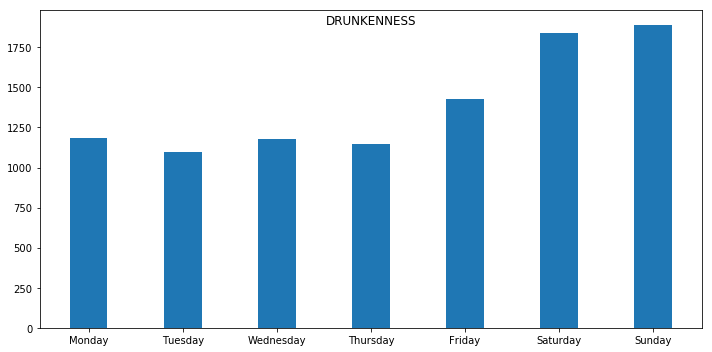

In [35]:
x_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,5))
temp = counts_pr_category_pr_week.loc[counts_pr_category_pr_week['Category'] == "DRUNKENNESS"].reset_index(drop=True)
x = temp["DayOfWeek"]
y = temp["counts"]
plt.title("DRUNKENNESS", pad=-14)
plt.bar(x, y, width=0.4)
plt.xticks(x, x_values)
plt.tight_layout()
plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))

plt.show()

*Now, if we show the plot, with incidents pr hor over the 168 hours week, this becomes clear:*

In [ ]:
policing_dataframe["HourOfWeek"] = policing_dataframe["Date_Time"].dt.dayofweek * 24 + policing_dataframe["Date_Time"].dt.hour
counts_pr_category_pr_hour_pr_week = policing_dataframe.groupby(by=["HourOfWeek", "Category"]).size().reset_index(name="counts")
counts_pr_category_pr_hour_pr_week = counts_pr_category_pr_hour_pr_week.loc[counts_pr_category_pr_hour_pr_week['Category'].isin(focuscrimes)].reset_index(drop=True)

In [ ]:
x_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday"]
x_position = [0,24,48,72,96,120,144,168]

plt.figure(figsize=(15,5))

temp = counts_pr_category_pr_hour_pr_week.loc[counts_pr_category_pr_hour_pr_week['Category'] == "DRUNKENNESS"].reset_index(drop=True)
x = temp["HourOfWeek"]
y = temp["counts"]
plt.title("DRUNKENNESS", pad=-14)
plt.bar(x, y, width=0.6, edgecolor="black")
plt.xticks(x_position, x_position)
plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))
plt.grid(which="major", axis="x", color="red")
plt.grid(which="minor", axis="x", color="gray")

*The phenomenon can be seen on the above plot, where the 120'th and 144'th hour represents midnight of Friday and Saturday. The previous plot would say the largest police force should be on the streets on the Sunday, when in fact Sunday is one of the 'normal' days for `DRUNKENNESS`*